# Chapter 03 - Regression

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats
import statsmodels.formula.api as smf

colors = plt.cycler(color=["#557A95",   "#957055", "#559570"]) 
sns.set_context('paper', font_scale=1.4)
plt.rcParams['figure.figsize'] = [9,6]
plt.rcParams['savefig.dpi'] = 300
plt.rc("legend", frameon=False)
plt.rc("axes.spines", top=False, right=False)
plt.rcParams['axes.prop_cycle'] = colors
mycolors = colors.by_key()["color"]

In [2]:
# Modules for interactivity
from ipywidgets import interact
import ipywidgets as widgets

In [3]:
# Modules for prediction
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

## Lineare Regression

### Concept

#### Creating fake data

In [4]:
n = 100
x = np.linspace(-4,4, num=n) # make x data
eps = stats.norm().rvs(n) # create randomness
ytrue = 3 + 4*x + eps*5 # make y data

#### Finding right parameters (i.e. fitting the model)

In [5]:
box = widgets.Checkbox(False, description="show errors")
b0 = widgets.FloatSlider(value=0, min=-10,max=10)
b1 = widgets.FloatSlider(value=0, min=-10,max=10)
def lreg(b0,b1, changed):
    fig, ax = plt.subplots(figsize=(12,7))
    sns.scatterplot(x=x, y=ytrue)
    plt.xlabel("x")
    plt.ylabel("y")
    alpha = 0 if b0==b1==0 else 1
    yhat = b0 + b1*x
    sns.lineplot(x=x, y=yhat, color="red", alpha=alpha,lw=3)
    ax.set_title("Relation y and X")
    error = ytrue - yhat
    if changed:
        rss = np.round(np.sum(error**2)/n, 2)
        ax.vlines(x=x, ymin=yhat, ymax=yhat+error, ls="--", color="gray")
        _, ymax = ax.get_ylim()
        xmin, _ = ax.get_xlim()
        ax.annotate(f"RSS: {rss}", xy=(xmin*0.98,ymax))
    
    sns.despine()

grid = widgets.GridspecLayout(10,6)
grid[0,:] = widgets.HBox([b0,b1,box])
grid[1:10,:] = widgets.interactive_output(lreg, {"b0":b0, "b1": b1, "changed":box})
grid

GridspecLayout(children=(HBox(children=(FloatSlider(value=0.0, max=10.0, min=-10.0), FloatSlider(value=0.0, ma…

## Prediction vs. evaluation

In [6]:
# Create model for illustrative purposes
n = 1000
x1 = stats.norm(10,3).rvs(n)
x2 = stats.poisson(5).rvs(n)
error = stats.norm(0,1).rvs(n) * 20
y = 4 + 10*x1 + 0*x2 + error 

In [7]:
# Load data into dataframe
df = pd.DataFrame(np.c_[x1,x2,y], columns=["x1","x2","y"])
df.head()

,x1,x2,y
0,13.693135,3.0,141.395639
1,9.272401,6.0,81.865817
2,6.170184,5.0,49.387306
3,7.604933,10.0,108.446290
4,9.586719,2.0,121.552904


In [8]:
# Evaluate model
model = smf.ols("y ~ x1 + x2", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     1142.
Date:                Thu, 28 Oct 2021   Prob (F-statistic):          1.36e-258
Time:                        19:08:23   Log-Likelihood:                -4410.9
No. Observations:                1000   AIC:                             8828.
Df Residuals:                     997   BIC:                             8843.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.4765      2.528      2.167      0.030       0.517      10.437
x1             9.8311      0.206     47.721      0.000       9.427      10.235
x2             0.1245      0.287      0.434      0.664      -0.438       0.687
==============================================================================
Omnibus:                        1.882   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.741
Skew:                           0.081   Prob(JB):                        0.419
Kurtosis:                       3.125   Cond. No.                         46.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
# Get yhats from estimated model
yhat = model.fittedvalues
df["yhat"] = yhat
df.head()

,x1,x2,y,yhat
0,13.693135,3.0,141.395639,140.468402
1,9.272401,6.0,81.865817,97.381223
2,6.170184,5.0,49.387306,66.758568
3,7.604933,10.0,108.446290,81.486139
4,9.586719,2.0,121.552904,99.973374


In [10]:
# Calculate MAE and MAPE
def mae(y,yhat):
    return 1/len(y) * np.sum(np.abs(y - yhat))
def mape(y,yhat):
    return 1/len(y) * np.sum(np.abs((y - yhat)/y))

In [11]:
mae(y,yhat), mape(y,yhat)

(15.872951868823305, 0.2894322124281587)

<AxesSubplot:xlabel='y', ylabel='yhat'>

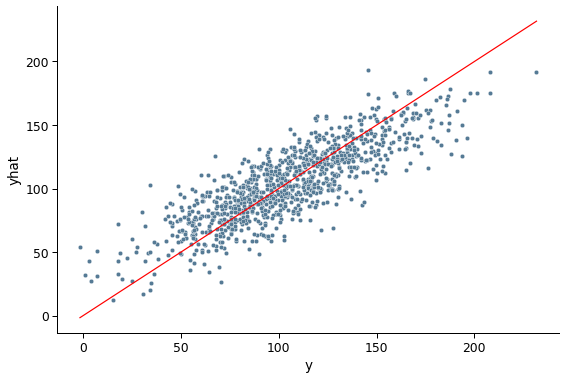

In [12]:
# Plot prediction vs. truth
sns.scatterplot(x="y", y="yhat", data=df, s=20)
sns.lineplot(x="y", y="y", data=df, color="red")

In [13]:
# Build perfect model
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [14]:
# Create more complex model
n = 100
x1 = np.linspace(-3,3, num=n)
error = stats.norm(0,1).rvs(n) * 2
y = 4 + 10*np.sin(x1) + error

<AxesSubplot:>

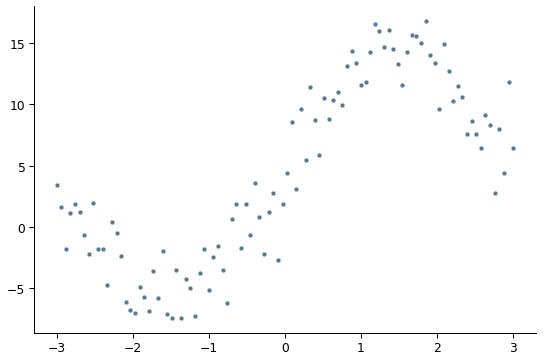

In [15]:
sns.scatterplot(x=x1, y=y)

In [16]:
# Put data into dataframe
df = pd.DataFrame(np.c_[x1,y], columns=["x1", "y"])
df.head()

,x1,y
0,-3.000000,3.399059
1,-2.939394,1.589485
2,-2.878788,-1.783492
3,-2.818182,1.099003
4,-2.757576,1.904767


In [17]:
# Estimate linear model using-
model = smf.ols("y ~ x1", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     138.8
Date:                Thu, 28 Oct 2021   Prob (F-statistic):           1.74e-20
Time:                        19:08:26   Log-Likelihood:                -298.05
No. Observations:                 100   AIC:                             600.1
Df Residuals:                      98   BIC:                             605.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3247      0.481      8.982      0.000       3.369       5.280
x1             3.2428      0.275     11.783      0.000       2.697       3.789
==============================================================================
Omnibus:                       24.451   Durbin-Watson:                   0.412
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.353
Skew:                          -0.048   Prob(JB):                       0.0688
Kurtosis:                       1.871   Cond. No.                         1.75
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
yhat = model.fittedvalues
df["yhat_lr"] = yhat

<AxesSubplot:>

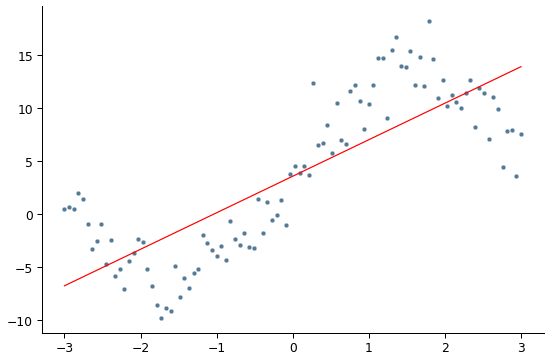

In [64]:
sns.scatterplot(x=x1, y=y)
sns.lineplot(x=x1, y=yhat, color="red")

<AxesSubplot:xlabel='y', ylabel='yhat_lr'>

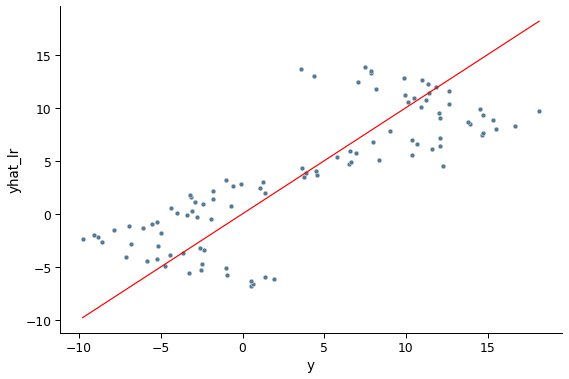

In [65]:
sns.scatterplot(x="y", y="yhat_lr", data=df)
sns.lineplot(x="y", y="y",data=df, color="red")

In [66]:
x1, y = df["x1"].values.reshape(-1,1), df["y"]

dt = DecisionTreeRegressor()
dt.fit(x1,y)

DecisionTreeRegressor()

In [67]:
yhat2 = dt.predict(x1)
x1 = x1.reshape(-1)

In [68]:
df["yhat_dt"] = yhat2

<AxesSubplot:ylabel='y'>

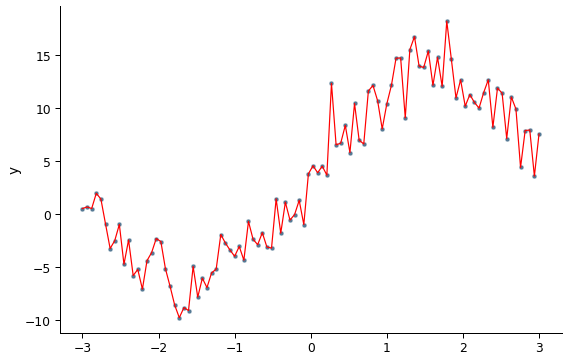

In [69]:
sns.scatterplot(x=x1, y=y)
sns.lineplot(x=x1, y=yhat2, color="red")

<AxesSubplot:xlabel='y', ylabel='yhat_dt'>

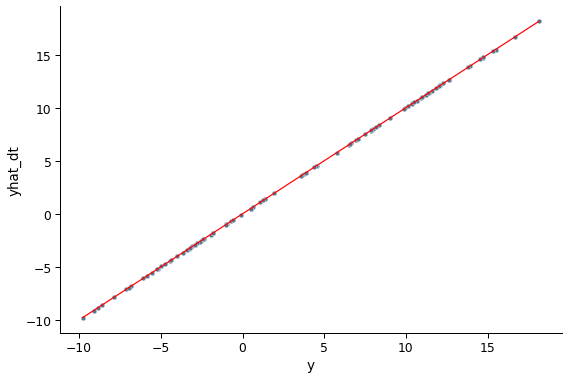

In [70]:
sns.scatterplot(x="y", y="yhat_dt", data=df)
sns.lineplot(x="y", y="y",data=df, color="red")